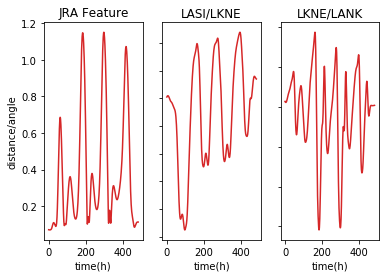

In [1]:
from pyomeca import Markers
import math
import matplotlib.pyplot as plt

data_path = "data/data.c3d"

def jra_method(p1, p2, p3):
    channels = [p1, p2, p3]
    markers = Markers.from_c3d(data_path, usecols=channels)
    
    #Implementation of variables
    first_dist = []
    second_dist = []
    distance = []
    angle = []
    time = []
    
    i = 0
    xl = yl = zl = 0
    xl_1 = yl_1 = zl_1 = 0

    while i < 485:
        
        xl = (markers[0][0][i] - markers[0][1][i])
        yl = (markers[1][0][i] - markers[1][1][i])
        zl = (markers[2][0][i] - markers[2][1][i])
        
        xl_1 = (markers[0][1][i] - markers[0][2][i])
        yl_1 = (markers[1][1][i] - markers[1][2][i])
        zl_1 = (markers[2][1][i] - markers[2][2][i])
        
        time.append(i)
    
        first_dist.append(math.sqrt((xl ** 2) + (yl ** 2) + (zl ** 2)))
        second_dist.append(math.sqrt((xl_1 ** 2) + (yl_1 ** 2) + (zl_1 ** 2)))                   
        distance.append(xl * xl_1 + yl * yl_1 + zl * zl_1)
    
        angle.append(math.acos(distance[i] / (first_dist[i] * second_dist[i])))
        
        i += 1
        
        return angle, time
                                  
#     fig, axs = plt.subplots(1, 3)
#     axs[0].plot(time, angle, 'tab:red')
#     axs[0].set_title('JRA Feature') 
#     axs[1].plot(time, first_dist, 'tab:red')
#     axs[1].set_title('LASI/LKNE')
#     axs[2].plot(time, second_dist, 'tab:red')
#     axs[2].set_title('LKNE/LANK')
    
#     for ax in axs.flat:
#         ax.set(xlabel='time(h)', ylabel='distance/angle')
        
#     for ax in axs.flat:
#         ax.label_outer()
    
    
jra_method('LASI','LKNE','LANK')
